In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time as tm
from matplotlib.colors import LogNorm

In [60]:
from cosmoHammer.ChainContext import ChainContext

In [61]:
from ClusterCosmologyModules import MassfunctionCoreModule, XRayLuminosityLikelihoodModule
from ClusterCosmologyModules import HubbleConstantPrior, BigBangNucleoSynthesisPrior
from ClusterCosmologyModules import MassLuminisityPrior, MassfunctionCoreModule_v2_PyCamb
from ClusterCosmologyModules import MassfunctionCoreModule_PyCamb

In [95]:
sampling_params = np.array([0.738, 0.0404, 0.25, 2.9, 1.61, 101.483, 1.85, 0.396])

#sampling_params  = np.array([ 7.42253297e-01, 4.00404962e-02, 2.24634752e-01, 3.09938756e+00, 1.55887811e+00, 1.01490824e+02, 1.65425492e+0, 3.97901961e-01])
ctx = ChainContext(parent=None, params=sampling_params)

In [96]:
sel_obs_bin = 120
z_bin = 200

In [97]:
DEFAULT_PARAMS = {'N_ncdm':0,
                  'Omega_k': 0.,
                  'gamma': 0.55,
                  'w0_fld':-1.,
                  'wa_fld':0.,
                  'n_s': 0.96, 
                  'DE_perturb':True
                   }
COSMOLOGY_PARAMETER_MAPPING = {'h': 0,
                               'Omega_b': 1,
                               'Omega_cdm': 2,
                               'ln10^{10}A_s': 3,
                               }
CLUSTER_PARAMETER_MAPPING = {'A_LM': 4,
                             'B_LM': 5,
                             'C_LM': 6,
                             'D_LM': 7
                             }

In [98]:
test_massfunction1 = MassfunctionCoreModule(constants=DEFAULT_PARAMS,
                                 cosmo_mapping=COSMOLOGY_PARAMETER_MAPPING,
                                 astro_mapping=CLUSTER_PARAMETER_MAPPING,
                                                  sel_obs_bin=sel_obs_bin, 
                                                  z_bin=z_bin)

In [99]:
test_massfunction1.setup()

In [100]:
start = tm.time()
test_massfunction1(ctx)
end = tm.time()
print end-start

4.41100788116


In [101]:
print ctx.getData()['sigma8']
massfct1 = ctx.get('Massfunction')
M_arr1 = ctx.get('M_arr')
print np.shape(massfct1)

0.84613955216
(199, 119)


In [102]:
test_massfunction2 = MassfunctionCoreModule_PyCamb(constants=DEFAULT_PARAMS,
                                 cosmo_mapping=COSMOLOGY_PARAMETER_MAPPING,
                                 astro_mapping=CLUSTER_PARAMETER_MAPPING,
                                                  sel_obs_bin=sel_obs_bin, 
                                                  z_bin=z_bin)

In [103]:
test_massfunction2.setup()

In [104]:
start = tm.time()
test_massfunction2(ctx)
end = tm.time()
print end-start

3.44725203514


In [105]:
massfct2 = ctx.get('Massfunction')
M_arr2 = ctx.get('M_arr')
print np.shape(massfct2)
print np.shape(np.ones((200,120)))

(199, 119)
(200, 120)


In [106]:
print ctx.getData()['sigma8']

0.846238867648


<matplotlib.colorbar.Colorbar instance at 0x1179d5e60>

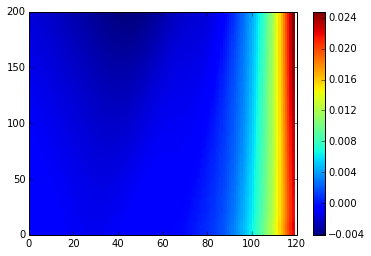

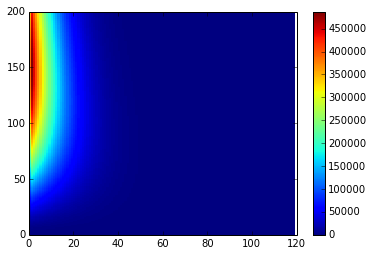

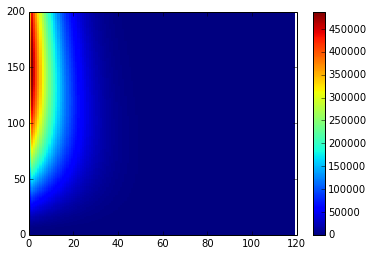

In [107]:
plt.figure()
plt.pcolormesh((massfct1-massfct2)/massfct1)
plt.colorbar()

plt.figure()
plt.pcolormesh(massfct1)
plt.colorbar()

plt.figure()
plt.pcolormesh(massfct2)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x120279b48>

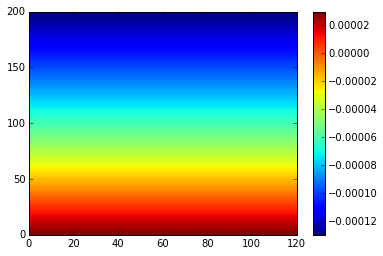

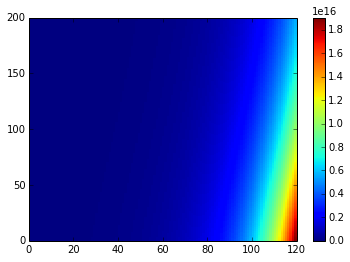

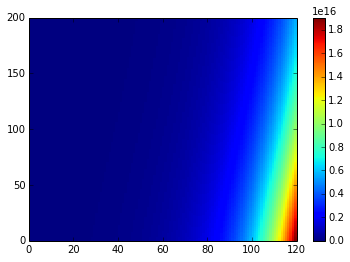

In [108]:
plt.figure()
plt.pcolormesh((M_arr1-M_arr2)/M_arr1)
plt.colorbar()

plt.figure()
plt.pcolormesh(M_arr1)
plt.colorbar()

plt.figure()
plt.pcolormesh(M_arr2)
plt.colorbar()

In [109]:
print np.shape(massfct1[1])

(119,)


In [110]:
test_hubble = HubbleConstantPrior(cosmo_mapping=COSMOLOGY_PARAMETER_MAPPING)
print test_hubble(ctx)

-0.000555555555556


In [111]:
test_BBNS = BigBangNucleoSynthesisPrior(cosmo_mapping=COSMOLOGY_PARAMETER_MAPPING)
print test_BBNS(ctx)

-0.000662674147556


In [112]:
test_LM = MassLuminisityPrior(mapping=CLUSTER_PARAMETER_MAPPING)
print test_LM(ctx)

-0.0


In [113]:
print test_likeli(ctx)+test_hubble(ctx)+test_BBNS(ctx)+test_LM(ctx)

353846.362035


In [128]:
test_massfunction3 = MassfunctionCoreModule_v2_PyCamb(constants=DEFAULT_PARAMS,
                                 cosmo_mapping=COSMOLOGY_PARAMETER_MAPPING,
                                 astro_mapping=CLUSTER_PARAMETER_MAPPING,
                                                  sel_obs_bin=sel_obs_bin, 
                                                  z_bin=z_bin)

In [129]:
test_massfunction3.setup()

In [130]:
start = tm.time()
test_massfunction3(ctx)
end = tm.time()
print end-start

2.35400485992


In [131]:
massfct3 = ctx.get('Massfunction')
M_arr3 = ctx.get('M_arr')

In [132]:
print ctx.getData()['sigma8']

0.846238867648


In [119]:
err = (massfct3-massfct2)/massfct3
print err
inds = np.where(err<-0.1)
print inds

[[-0.46600182 -1.00259103 -1.00261724 ..., -1.04034614 -1.0416044
  -0.91269847]
 [ 0.26618253 -0.00240275 -0.0023919  ..., -0.01643694 -0.01729574
   0.04677425]
 [ 0.26648978 -0.00200125 -0.00199901 ..., -0.01703861 -0.01778315
   0.04648819]
 ..., 
 [ 0.27051007 -0.00167603 -0.0017019  ..., -0.02451902 -0.02490967
   0.00249881]
 [ 0.2705337  -0.00167795 -0.00170437 ..., -0.02453861 -0.02493025
   0.00230656]
 [ 0.2705573  -0.00167987 -0.0017068  ..., -0.02455745 -0.02495326
   0.00211502]]
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16, 

<matplotlib.colorbar.Colorbar instance at 0x11512c2d8>

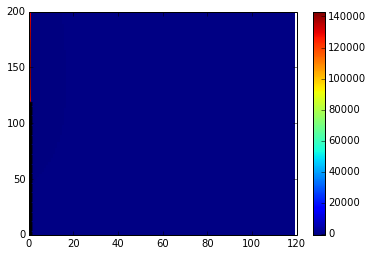

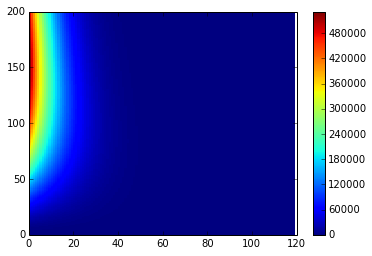

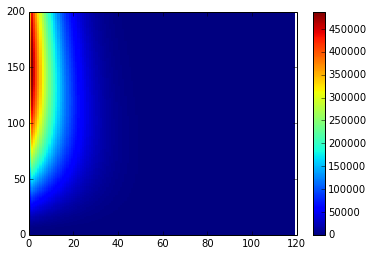

In [120]:
plt.figure()
plt.pcolormesh((massfct3-massfct2))
plt.plot(inds[0], inds[1], 'k*')
plt.colorbar()

plt.figure()
plt.pcolormesh(massfct3)
plt.colorbar()

plt.figure()
plt.pcolormesh(massfct2)
plt.colorbar()

In [121]:
test_likeli = XRayLuminosityLikelihoodModule(astro_mapping=CLUSTER_PARAMETER_MAPPING, debug_mode=True,
                                                  sel_obs_bin=sel_obs_bin, 
                                                  z_bin=z_bin)
start = tm.time()
test_likeli.setup()
end = tm.time()
print end-start

3.44449305534


In [122]:
start = tm.time()
print test_likeli(ctx)
end = tm.time()
print end-start

353849.814067
0.00480508804321


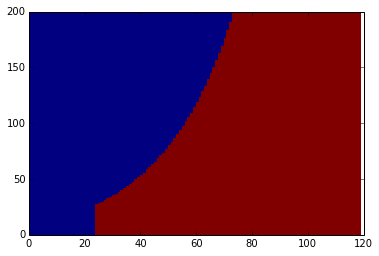

In [123]:
plt.figure()
plt.pcolormesh(test_likeli.mask)

(199, 119)
115750.0


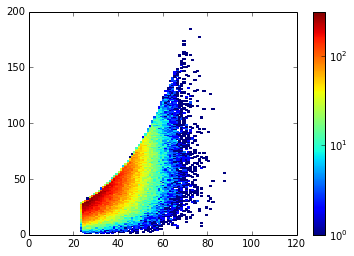

In [124]:
H = test_likeli.n

print np.shape(H)

Hmasked1 = np.ma.masked_where(H==0,H)
vmax = np.amax(Hmasked1)
vmin = np.amin(Hmasked1)

plt.figure()
plt.pcolormesh(Hmasked1, edgecolors='None',norm=LogNorm(vmax=vmax, vmin=vmin))
plt.colorbar()

print np.sum(test_likeli.n)

(199, 119)
107141.0


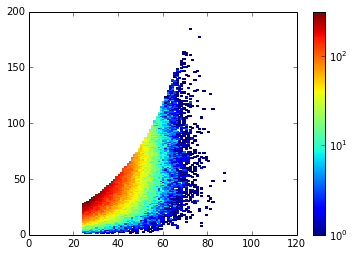

In [125]:
H = test_likeli.n_obs

print np.shape(H)

Hmasked1 = np.ma.masked_where(H==0,H)
vmax = np.amax(Hmasked1)
vmin = np.amin(Hmasked1)

plt.figure()
plt.pcolormesh(Hmasked1, edgecolors='None',norm=LogNorm(vmax=vmax, vmin=vmin))
plt.colorbar()

print np.sum(test_likeli.n_obs)

(199, 119)
107363.386476


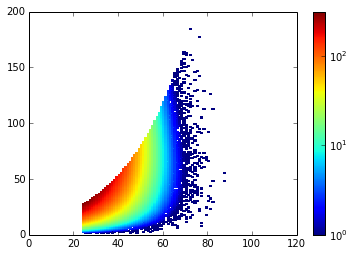

In [126]:
H2 = test_likeli.N

print np.shape(H2)

Hmasked2 = np.ma.masked_where(H==0,H2)

plt.figure()
plt.pcolormesh(Hmasked2, edgecolors='None',norm=LogNorm(vmax=vmax, vmin=vmin))
plt.colorbar()

print np.sum(test_likeli.N)

-0.659614453945


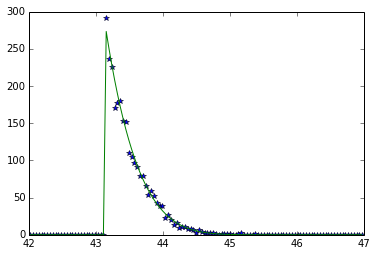

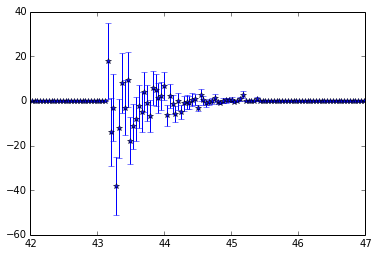

In [127]:
ind_z = 30
x = np.log10(test_likeli.sel_obs_arr)
x = 0.5*(x[1:]+x[:-1])
plt.figure()
plt.plot(x, test_likeli.n_obs[ind_z], '*')
plt.plot(x, test_likeli.N[ind_z], '-')
plt.savefig('redshift_slice_grid%ix%i.pdf' %(z_bin, sel_obs_bin))

plt.figure()
plt.errorbar(x, test_likeli.n_obs[ind_z] -test_likeli.N[ind_z], yerr=np.sqrt(test_likeli.n_obs[ind_z]), fmt='*')
print np.mean(test_likeli.n_obs[ind_z] -test_likeli.N[ind_z])
plt.savefig('err_redshift_slice_grid%ix%i.pdf' %(z_bin, sel_obs_bin))